In [5]:
# import important libraries

# Used for data analysis
import pandas as pd
import numpy as np

# used for data visualization
import seaborn as sns    # For loading the dataset
import matplotlib.pyplot as plt

# for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# classifiers libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Load dataset

df = pd.read_csv(r"C:\Users\ubahl\OneDrive\Desktop\heart - heart.csv")

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# data verification, data type, number of features, rows, missing data etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

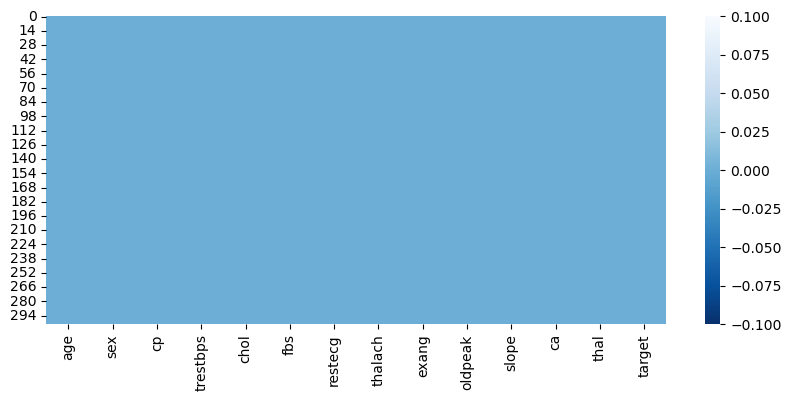

In [17]:
# To visualize the missing data

plt.figure(figsize = (10,4))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")


In [ ]:
# Narration: This visualization confirms that there are no missing values in the dataset.
# The consistent color throughout the heatmap means that every entry in the dataset is filled with valid data.

# Exploratory Data Analysis

## Univariate Analysis


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

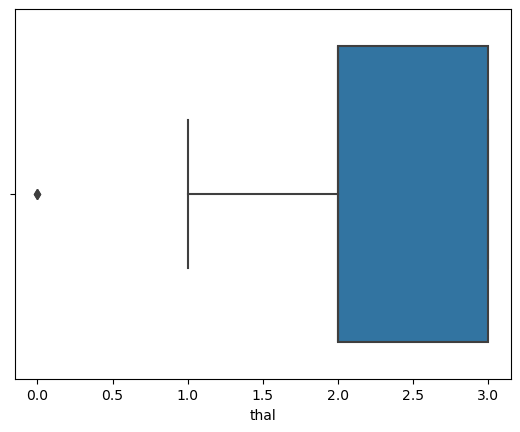

In [21]:
# check for ouliers
sns.boxplot(x=df["thal"]);

In [ ]:
# Narration:  The presence of one point outside the whiskers indicates that there's one potential outlier in the thal column. 
# This value could be unusually high or low compared to the rest of the dataset.

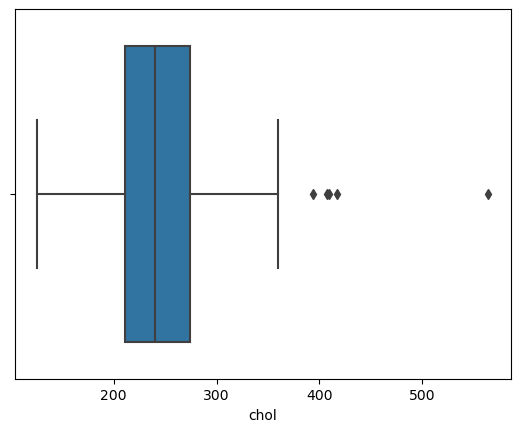

In [22]:
sns.boxplot(x=df["chol"]);

In [ ]:
# Narration: The presence of four points outside the whiskers in the boxplot for the chol column indicates four potential outliers. 
# These values are significantly higher or lower than the majority of the dataset.

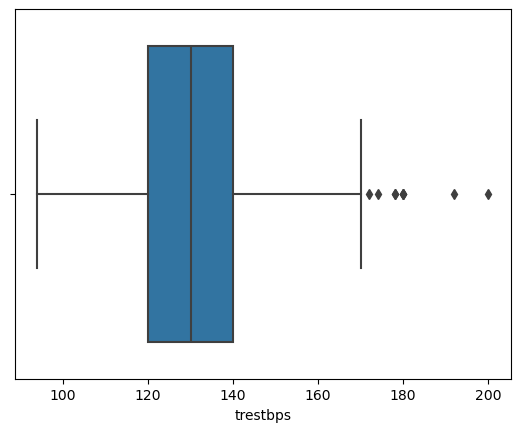

In [23]:
sns.boxplot(x=df["trestbps"]);

In [ ]:
# Narration: The presence of four points outside the whiskers in the boxplot for the trestbps column indicates six potential outliers. 
# These values are significantly higher or lower than the majority of the dataset.

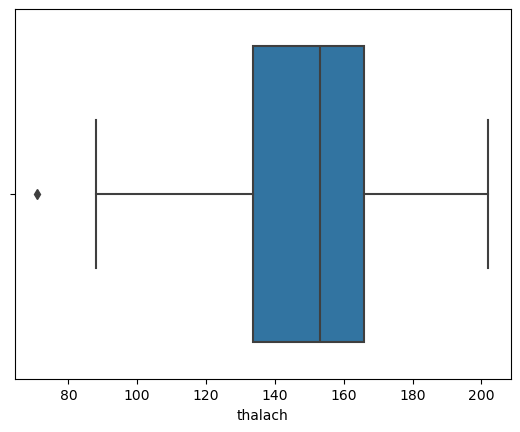

In [28]:
sns.boxplot(x=df["thalach"]);

In [ ]:
# Narration: The presence of one point outside the whiskers in the boxplot for the chol column indicates one potential outliers. 
# These value is significantly higher or lower than the majority of the dataset.

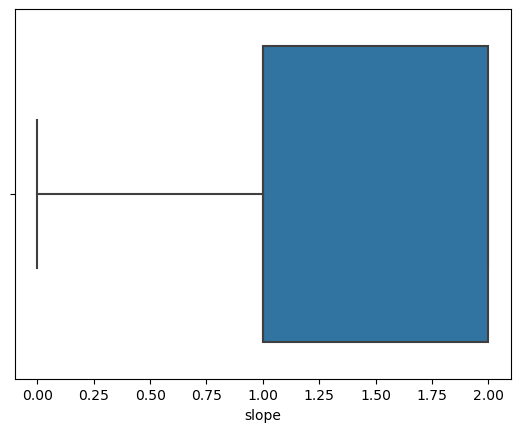

In [29]:
sns.boxplot(x=df["slope"]);

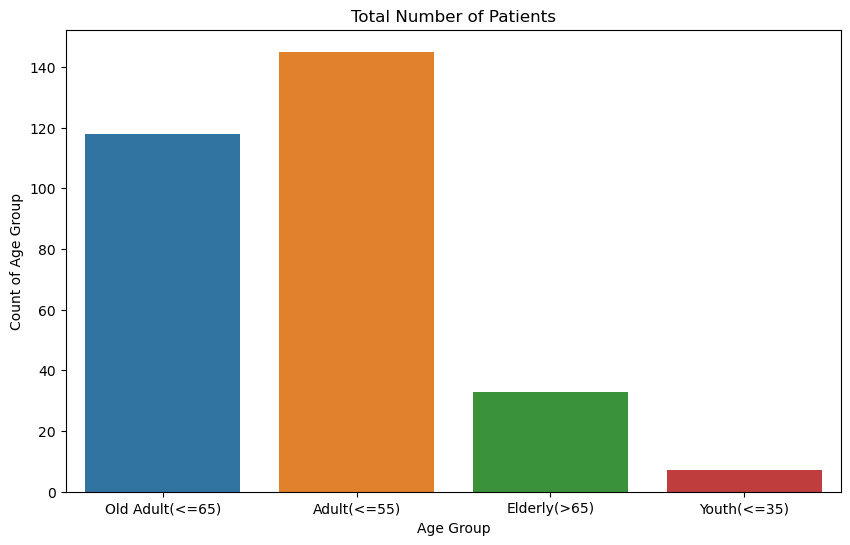

In [34]:
# Data visualization on age bracket
#Age_bracket

def age_bracket(age):
    if age <=35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df["age_bracket"] = df["age"].apply(age_bracket)


# Investigating the age group of patients
plt.figure(figsize=(10,6))
sns.countplot(x="age_bracket", data=df)
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

In [ ]:
# Nararation: This visualization aims to show how many patients fall into each age bracket or age group within the dataset.
# Bar Heights: The height of each bar indicates the number of patients in that specific age bracket.
# Taller bars signify more patients in that age group.
# Shorter bars indicate fewer patients in that age bracket.
# Here we can see that we have the highest number of patients within the age bracket of 36-55 followed 
# by 65 with age bracket of 35 and below been the least represented in this dataset.

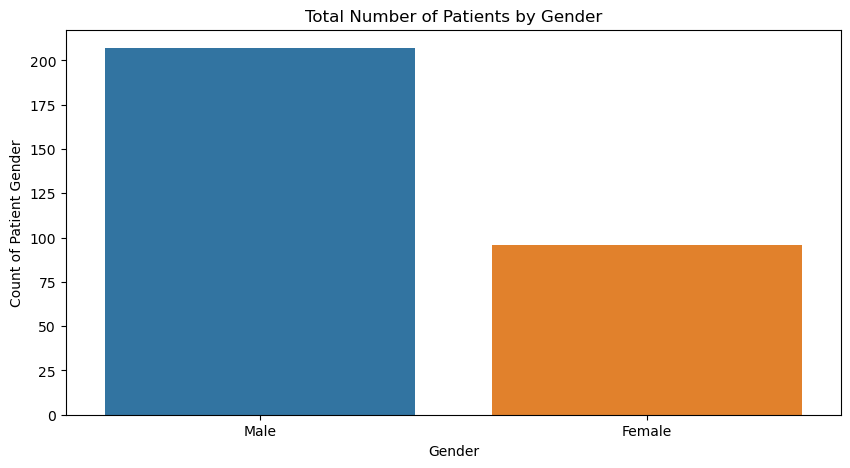

In [41]:
# visualizing the sex column

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
df["gender"] = df["sex"].apply(gender)

# investigating the gender of patients

plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df)
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients by Gender");

In [ ]:
# Narration: This visualization provides insight into how many males and females are present in the dataset. 
# the countplot/bar plot above means there are more male patients in the dataset.

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


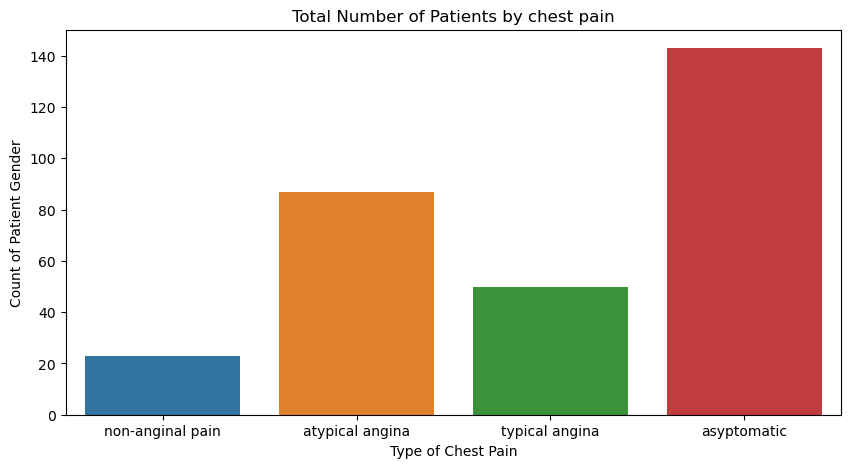

In [48]:
# Data visualization
# chest pain type (1: typical angina, 2: atypical angina, 3: non anginal pain, 4: asyptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asyptomatic"

df["cp_category"] = df["cp"].apply(chest_pain)

# investigating the gender of patients with chest pain

plt.figure(figsize=(10,5))
sns.countplot(x="cp_cat", data=df)
plt.xlabel("Type of Chest Pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients by chest pain");

In [ ]:
# Narration: This visualization show how many patients are categorized under each type of chest pain.
# from the countplot above, asyptomatic is the most common type of chest pain among the patients in 
# the dataset followed by atypical angina and having less than 30 patients living without any chest pain.

label
Yes    165
No     138
Name: count, dtype: int64


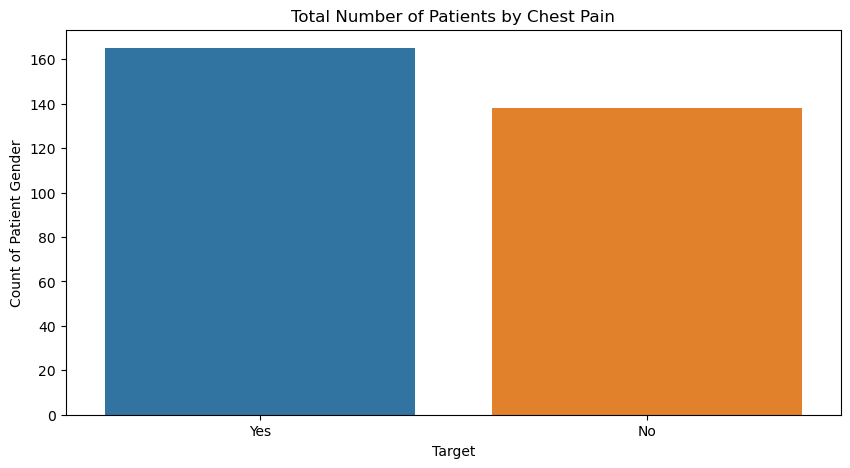

In [52]:
# Data visualization on target
# target - have disease or not (1=Yes, 0=No)

def label (tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
df["label"] = df["target"].apply(label)

# Total number in each category
print(df["label"].value_counts())

# investigating the gender of patients by chest pain
plt.figure(figsize=(10,5))
sns.countplot(x="label", data=df)
plt.xlabel("Target")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients by Chest Pain");

In [ ]:
# Narration: The countplot visualizes the distribution of patients across different categories in the label column.
# from the bar plot above, we have 165 number of patients with heart disease and 138 patients does not have heart disease.

# Bivariate Analysis

In [ ]:
# Here you are compaaring two columns

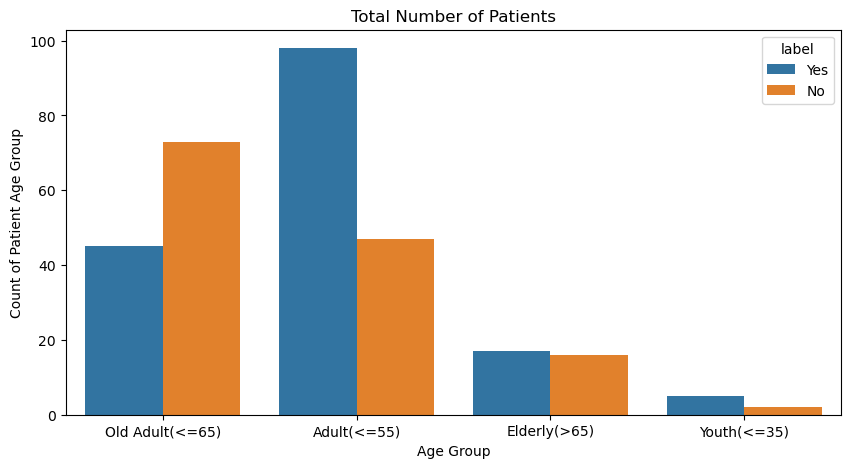

In [53]:
# Investigating the age group of patients by target column

plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Patient Age Group")
plt.title("Total Number of Patients");

In [ ]:
# Narration: "The countplot provides a clear visualization of the distribution of patients across various age brackets, 
# segmented by the target variable label. The plot reveals that: patients within the age bracket of 36-55 mostly have heart disease
# while a very low number of patients with the age bracket of 35 and below does not have heart disease.

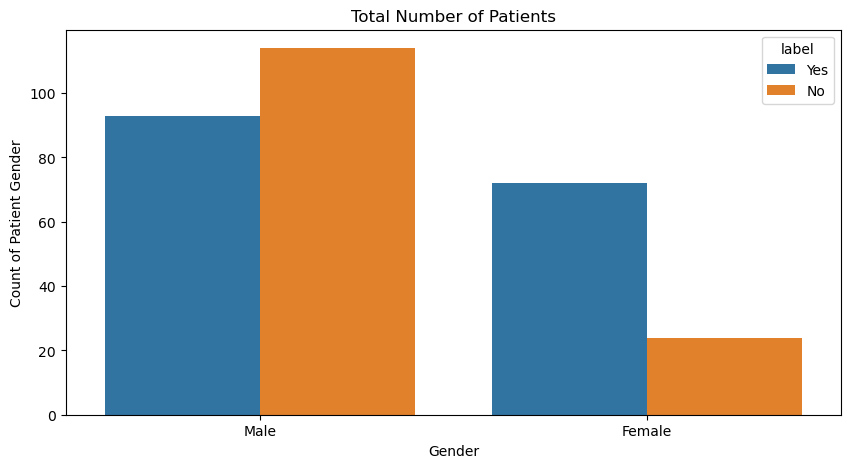

In [54]:
# Investigating the gender of patients by target column(feature)

plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df, hue="label")
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients");

In [ ]:
# Narration: This countplot analyze the distribution of patients based on gender and further break this down by a target column,
# this shows that we have more males with heart disease than female. Based on the number of females in the dataset, 
# it shows that high percentage of the females have heart disease than the percentage of male.

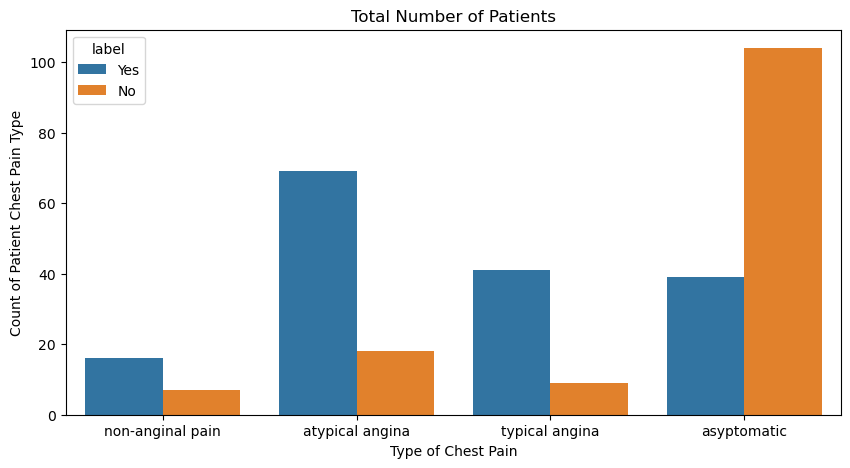

In [59]:
# Investigating the chest pain type of patients by target column(feature)

plt.figure(figsize=(10,5))
sns.countplot(x="cp_category", data=df, hue="label")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Count of Patient Chest Pain Type")
plt.title("Total Number of Patients");

In [ ]:
# Narration: This countplot analyze the distribution of chest pain types to the target column. 
# this plot shows that people living with atypical angina type of chest pain have heart disease compared to other types of chest pain.

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

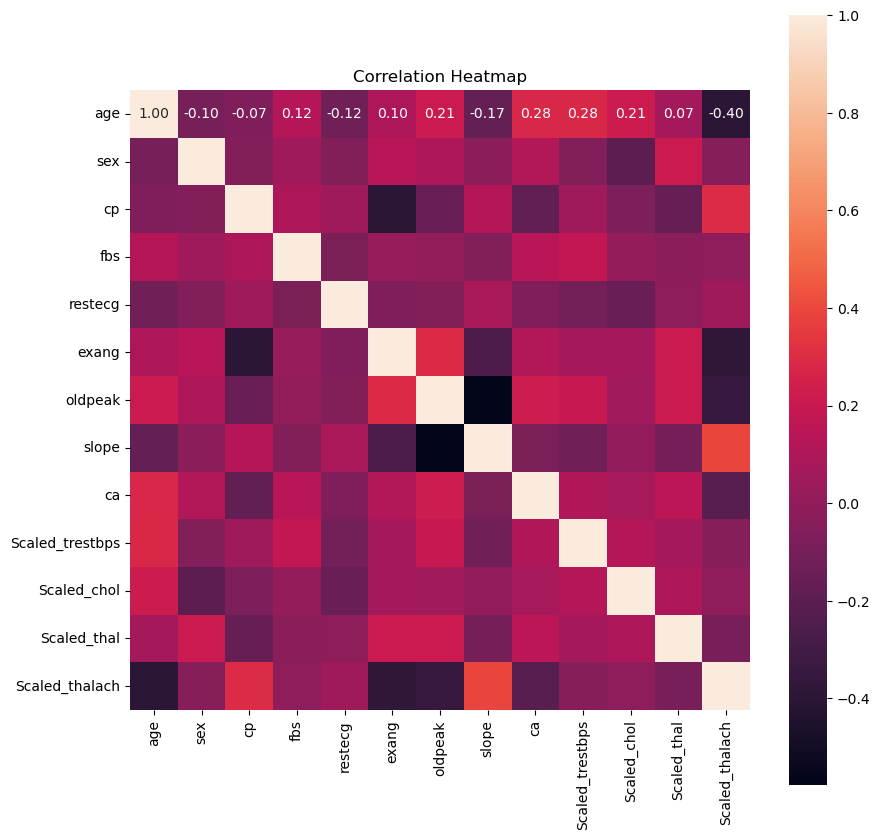

In [135]:
# Here we compare three or more columns/features
# Correlation between target column and other variables in the dataset

plt.figure(figsize=(10,10))
hm = sns.heatmap(df1.corr(), cbar=True, annot=True, square=True, fmt=".2f",
                 annot_kws={"size": 10})
plt.title('Correlation Heatmap')

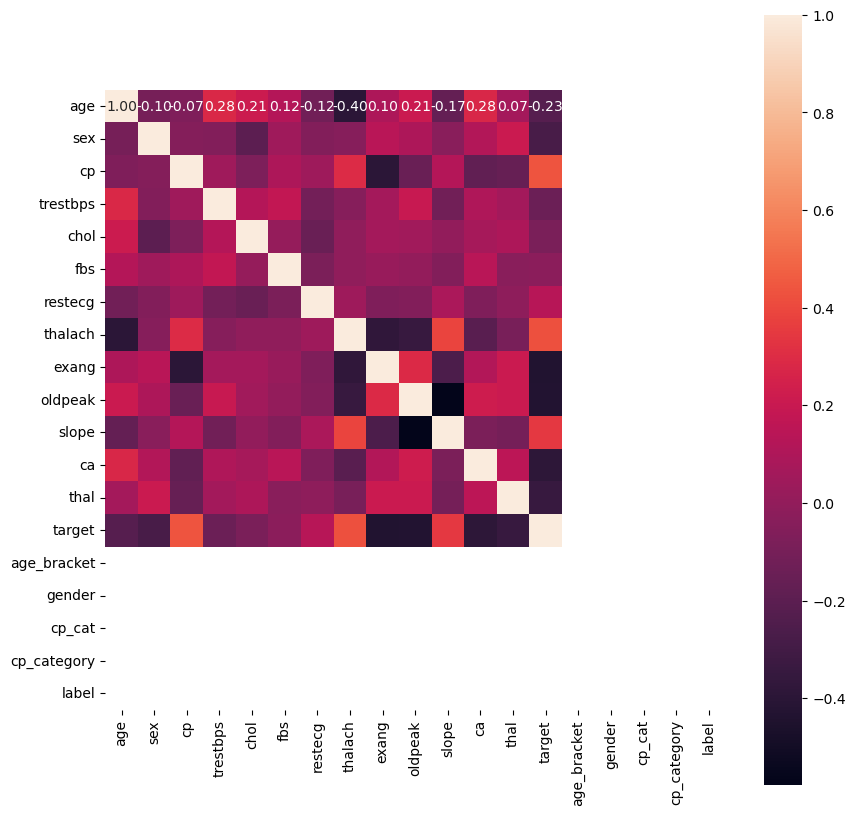

In [134]:

plt.figure(figsize=(10, 10))

# Create a heatmap

# Ensure the DataFrame contains numeric data for correlation computation
df = df.apply(pd.to_numeric)

hm = sns.heatmap(
    df.corr(),                # Correlation matrix
    cbar=True,                # Show color bar
    annot=True,               # Annotate cells with correlation coefficients
    square=True,              # Make the heatmap square-shaped
    fmt=".2f",               # Format annotation text to 2 decimal places
    annot_kws={"size": 10}   # Font size for annotations
)

plt.show()

## Data Pre-Processing/ Feature Engineering

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket,gender,cp_cat,cp_category,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asyptomatic,asyptomatic,Yes


In [65]:
# Create a copy of the dataset (exclude target/label alongside other columns that was created)

df1 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
label = df[["target"]]

In [66]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [67]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [75]:
df1.dtypes

age                  int64
sex                  int64
cp                   int64
fbs                  int64
restecg              int64
exang                int64
oldpeak            float64
slope                int64
ca                   int64
Scaled_trestbps    float64
Scaled_chol        float64
Scaled_thal        float64
Scaled_thalach     float64
dtype: object

In [ ]:
# Dealing with outliers - trestbps , chol, thal, thalach
# Normalize the data

scaler = MinMaxScaler()

df1['scaled_trestbps'] = scaler.fit_transform(df1['trestbps'].values.reshape(-1,1))
df1["scaled_chol"] = scaler.fit_transform(df1[["chol"]].values.reshape(-1,1))
df1["scaled_thal"] = scaler.fit_transform(df1[["thal"]].values.reshape(-1,1))
df1["scaled_thalach"] = scaler.fit_transform(df1["thalach"].values.reshape(-1,1))

# Drop the original columns
df1.drop(["trestbps", "chol", "thal", "thalach"], axis=1, inplace=True)

In [84]:
df1.head()


,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_trestbps,Scaled_chol,Scaled_thal,Scaled_thalach
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [89]:
# Split the dataset into training and test sets 
# take it this way, X=Questions, y= Answers

X_train, X_test,y_train, y_test = train_test_split(df1,label,test_size=0.2, random_state=42)

In [91]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:", recall_score(y_test,ly_pred))
print("F1-score:", f1_score(y_test,ly_pred))
print("AUC-ROC:", roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


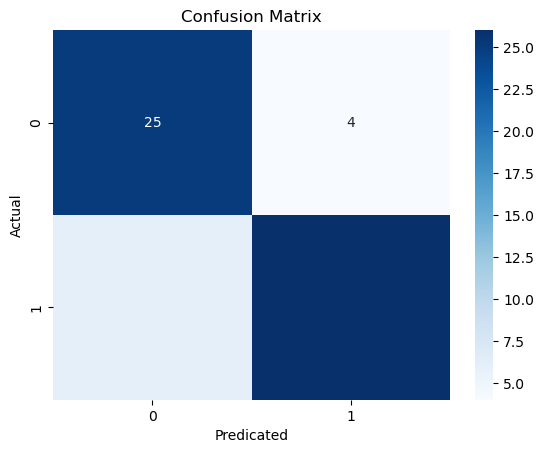

In [93]:
# Create a confusion matrix
lcm = confusion_matrix(y_test,ly_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [96]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,rfy_pred))
print("Precision:", precision_score(y_test,rfy_pred))
print("Recall:", recall_score(y_test,rfy_pred))
print("F1-score:", f1_score(y_test,ly_pred))
print("AUC-ROC:", roc_auc_score(y_test,rfy_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8387096774193549
AUC-ROC: 0.8512931034482758


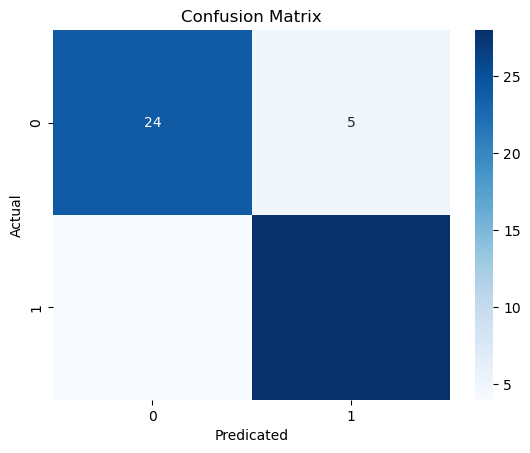

In [97]:
# Create a confusion matrix for Random Forest
rcm = confusion_matrix(y_test,rfy_pred)

# Visualise the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [103]:
# To deploy 8 machine learning Algorithms to the dataset

classifiers = [[XGBClassifier(), "XGB Classifier"],
              [RandomForestClassifier(), "Random Forest"],
              [KNeighborsClassifier(), "K-Nearest Neighbors"],
              [SGDClassifier(), "SGD Classifer"],
              [SVC(),"SVC"],
              [GaussianNB(), "Naive Bayes"],
              [DecisionTreeClassifier (random_state = 42), "Decision tree"],
              [LogisticRegression(), "Logistic Regression"]]

In [104]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifer'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeCl

In [105]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train,y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred)

    acc_list[model_name] = ([str(round(a_score*100,2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100,2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100,2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + "%"])

    if model_name != classifiers[-1][1]:
        print ("")

In [106]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['86.89%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifer': ['88.52%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [110]:
# To put the above list in a table/Dataframe

print("Acurracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Acurracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifer,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,86.89%,75.41%,88.52%,65.57%,86.89%,85.25%,83.61%


In [107]:
precision_list

{'XGB Classifier': ['86.21%'],
 'Random Forest': ['85.29%'],
 'K-Nearest Neighbors': ['79.31%'],
 'SGD Classifer': ['87.88%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision tree': ['92.59%'],
 'Logistic Regression': ['86.67%']}

In [111]:
# To put the above list in a table/Dataframe

print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifer,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,85.29%,79.31%,87.88%,65.71%,90.0%,92.59%,86.67%


In [108]:
recall_list

{'XGB Classifier': ['78.12%'],
 'Random Forest': ['90.62%'],
 'K-Nearest Neighbors': ['71.88%'],
 'SGD Classifer': ['90.62%'],
 'SVC': ['71.88%'],
 'Naive Bayes': ['84.38%'],
 'Decision tree': ['78.12%'],
 'Logistic Regression': ['81.25%']}

In [112]:
# To put the above list in a table/Dataframe

print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifer,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,90.62%,71.88%,90.62%,71.88%,84.38%,78.12%,81.25%


In [109]:
roc_list

{'XGB Classifier': ['82.17%'],
 'Random Forest': ['86.69%'],
 'K-Nearest Neighbors': ['75.59%'],
 'SGD Classifer': ['88.42%'],
 'SVC': ['65.25%'],
 'Naive Bayes': ['87.02%'],
 'Decision tree': ['85.61%'],
 'Logistic Regression': ['83.73%']}

In [113]:
# To put the above list in a table/Dataframe

print("Roc Score")
s4 = pd.DataFrame(roc_list)
s4.head()

Roc Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifer,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,86.69%,75.59%,88.42%,65.25%,87.02%,85.61%,83.73%


In [ ]:
# Conclusion, 
# In this project, we successfully developed and implemented a machine learning model to predict the possibility 
# of a patient with different health condition having heart disease.
#  By leveraging a diverse dataset, we applied various algorithms, including "logistic regression, decision trees, and random forests, 
# KNeighbors, SGD, GaussianNB"], and evaluated their performance using metrics such as accuracy, precision, recall, and F1-score.  